In [1]:
import subprocess
import time

def run_once(parser, iter_num=100000000):
    start_time = time.monotonic()
    subprocess.run(['./main', '-p', parser, '-n', str(iter_num), '-x', '4', '2+2*x'])
    end_time = time.monotonic()
    return (end_time - start_time) / iter_num

In [2]:
dp = {}
for parser in ['compute', 'ast_rec', 'ast_iter']:
    dp[parser] = d = []
    for i in range(100):
        d.append({'time': run_once('ast_iter')})

In [3]:
import pandas
df = pandas.concat({parser: pandas.io.json.json_normalize(d) for parser, d in dp.items()})
df.reset_index(level=0, inplace=True)
df.rename(columns={'level_0': 'parser'}, inplace=True)

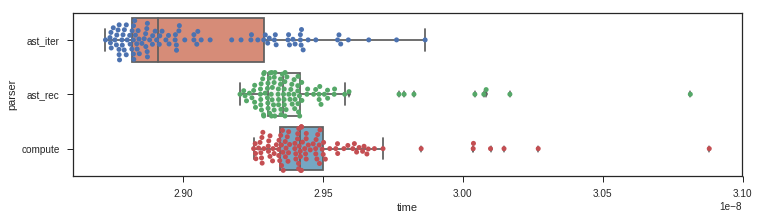

In [4]:
import seaborn
from matplotlib import pyplot
import numpy
f, ax = pyplot.subplots(figsize=(12, len(dp)))
#ax.set_xscale("log")
seaborn.set(style='ticks')
seaborn.boxplot(x='time', y='parser', data=df, palette='RdBu')
seaborn.swarmplot(x='time', y='parser', data=df)
pyplot.show()